In [60]:
import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn import svm
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn
%matplotlib inline

In [61]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [62]:
data = pd.read_csv('drive/MyDrive/Code/creditcard.csv')
df = pd.DataFrame(data)

**DATA VISUALIZATION**

In [63]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [64]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


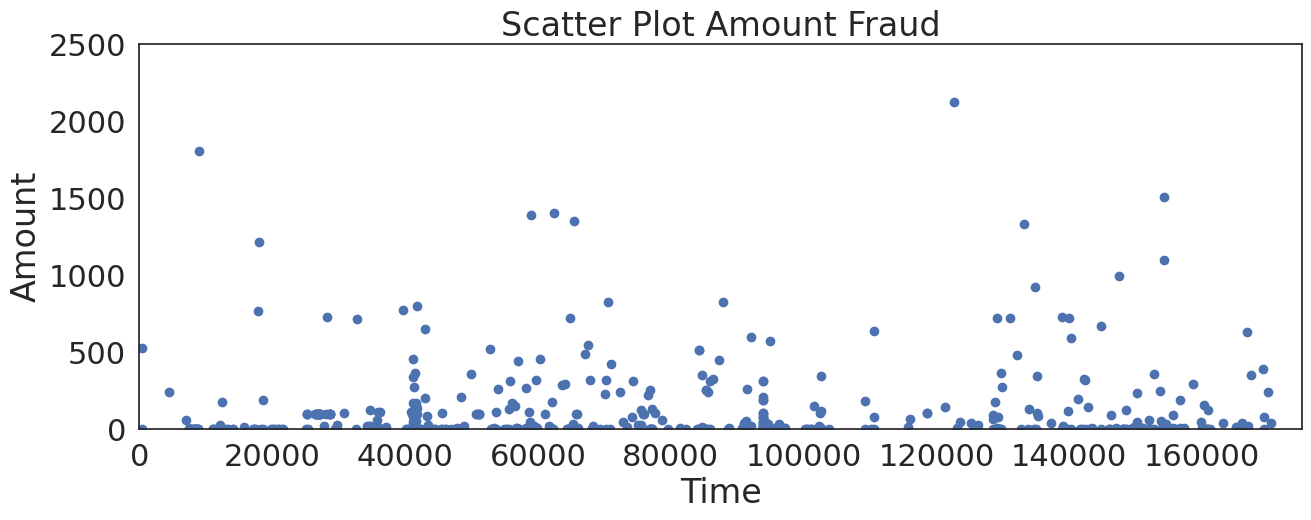

In [65]:
df_fraud = df[df['Class'] == 1]
plt.figure(figsize=(15,5))
plt.scatter(df_fraud['Time'], df_fraud['Amount'])
plt.title('Scatter Plot Amount Fraud')
plt.xlabel('Time')
plt.ylabel('Amount')
plt.xlim([0,175000])
plt.ylim([0,2500])
plt.show()

In [66]:
nb_big_fraud = df_fraud[df_fraud['Amount'] > 1000].shape[0] # Recovery of frauds over 1000
print('There are only {} frauds where the amount was bigger than 1000 over {} frauds.'.format(str(nb_big_fraud),str(df_fraud.shape[0])))

There are only 9 frauds where the amount was bigger than 1000 over 492 frauds.


**UNBALANCED DATA**

In [67]:
number_fraud = len(data[data.Class == 1])
number_no_fraud = len(data[data.Class == 0])
print('There are only {} frauds in the orginal dataset, even though there are {} no frauds in dataset.'.format(str(number_fraud),str(number_no_fraud)))

There are only 492 frauds in the orginal dataset, even though there are 284315 no frauds in dataset.


In [68]:
print('The accuracy of the classifier then would be : {} which is the number of good classification over the number of tupple to classify.'.format(str((284315-492)/284315)))

The accuracy of the classifier then would be : 0.998269524998681 which is the number of good classification over the number of tupple to classify.


**CORRELATION OF THE FEATURES**

In [69]:
df_corr = df.corr() # Pearson, Standard Correlation Coefficient

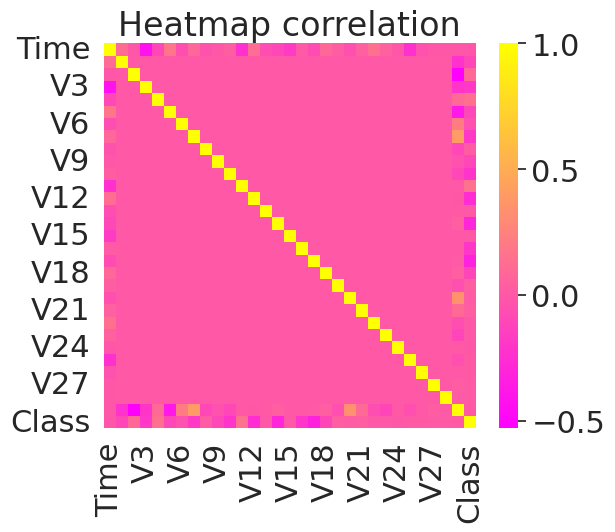

In [70]:
plt.figure(figsize=(6,5))
seaborn.heatmap(df_corr, cmap='spring')
seaborn.set(font_scale=2,style='white')

plt.title('Heatmap correlation')
plt.show()


**DATA SELECTION**

UNDERSAMPLING

In [71]:
df_train_all = df[0:150000] # We divide the original dataset in two parts
df_train_1 = df_train_all[df_train_all['Class'] == 1]
df_train_0 = df_train_all[df_train_all['Class'] == 0]
print('In this dataset, we have {} frauds so we need to take a similar number of non-fraud'.format(len(df_train_1)))

df_sample=df_train_0.sample(300)
df_train = pd.concat([df_train_1, df_sample]) # We gather the frauds with the no frauds.
df_train = df_train.sample(frac=1) # Then we mix our dataset

In this dataset, we have 293 frauds so we need to take a similar number of non-fraud


In [72]:
X_train = df_train.drop(['Time', 'Class'],axis=1) # We drop the features Time (useless), and the Class (label)
y_train = df_train['Class'] # We create our label
X_train = np.asarray(X_train)
y_train = np.asarray(y_train)

In [73]:
# with all the test dataset to see if the model learn correctly
df_test_all = df[150000:]

X_test_all = df_test_all.drop(['Time', 'Class'],axis=1)
y_test_all = df_test_all['Class']
X_test_all = np.asarray(X_test_all)
y_test_all = np.asarray(y_test_all)

**FUNCTION FOR CONFUSION MATRIX**

In [74]:
class_names=np.array(['0','1'])

In [75]:
import itertools
# Function to plot confusion matrix
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.spring):
  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True Value')
  plt.xlabel('Predicted Value')

**APPLYING LOGISTIC REGRESSION**

In [76]:
from sklearn.linear_model import LogisticRegression

In [77]:
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

LogisticRegression()

In [78]:
print(classifier.intercept_, classifier.coef_)

[-3.06606873] [[ 6.21953903e-02 -2.86413586e-01 -1.21787027e-01  9.36801624e-01
  -5.42750735e-01  1.66056993e-01  4.77646083e-01 -1.14381101e+00
  -1.39278377e-01 -7.64219417e-01  3.09859150e-01 -1.12875424e+00
  -3.80514072e-01 -1.17957344e+00 -9.34614157e-02 -3.55101068e-01
  -6.29874430e-01  1.87725232e-01 -2.63982894e-02 -5.85915068e-02
   1.94318718e-01  2.81561837e-01 -5.64651152e-02 -4.63008548e-01
   3.71335495e-02 -2.43585952e-01  4.36995920e-01 -8.93029398e-02
  -9.49305943e-04]]


In [79]:
pred = classifier.predict(X_train)

In [80]:
print('Accuracy from sklearn: {}.'.format(classifier.score(X_train, y_train)))

Accuracy from sklearn: 0.9595278246205734.


**CONFUSION MATRIX**

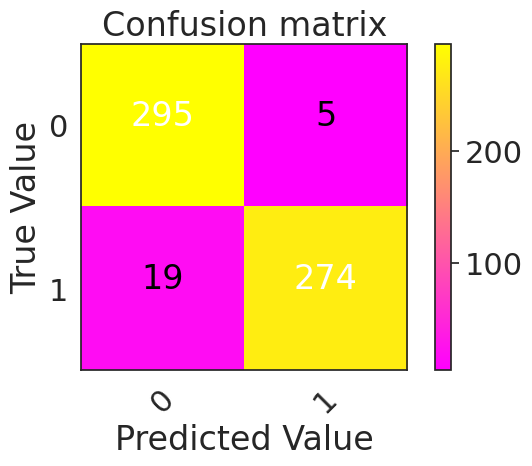

In [81]:
cm = confusion_matrix(y_train, pred)
plot_confusion_matrix(cm,class_names)

**Precision, Recall, F1-Score, Mean Absolute Error, Mean Percentage Error and Mean Squared Error**

In [82]:
from sklearn.metrics import classification_report, mean_absolute_error, mean_squared_error, r2_score
report = classification_report(y_train, pred)
print(report)

              precision    recall  f1-score   support

           0       0.94      0.98      0.96       300
           1       0.98      0.94      0.96       293

    accuracy                           0.96       593
   macro avg       0.96      0.96      0.96       593
weighted avg       0.96      0.96      0.96       593



In [84]:
mean_abs_error = mean_absolute_error(y_train,pred)
mean_abs_percentage_error = np.mean(np.abs((y_train - pred) / y_train), where=(y_train != 0))
mse= mean_squared_error(y_train,pred)
r2_calculated_value = r2_score(y_train,pred)
print("Mean absolute error : {} \nMean Absolute Percentage error : {}\nMean Squared Error : {}\nR Squared Error: {}".format(mean_abs_error,mean_abs_percentage_error,mse,r2_calculated_value))

Mean absolute error : 0.04047217537942664 
Mean Absolute Percentage error : 0.06484641638225255
Mean Squared Error : 0.04047217537942664
R Squared Error: 0.8380887372013652


**Undersampling using Synthetic Minority Oversampling Technique (SMOTE) approach**

In [85]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train_smote, y_train_smote = oversample.fit_resample(X_train, y_train)

**APPLYING LOGISTIC REGRESSION**

In [86]:
classifier.fit(X_train, y_train)

LogisticRegression()

In [87]:
print(classifier.intercept_, classifier.coef_)
pred = classifier.predict(X_train)

[-3.06606873] [[ 6.21953903e-02 -2.86413586e-01 -1.21787027e-01  9.36801624e-01
  -5.42750735e-01  1.66056993e-01  4.77646083e-01 -1.14381101e+00
  -1.39278377e-01 -7.64219417e-01  3.09859150e-01 -1.12875424e+00
  -3.80514072e-01 -1.17957344e+00 -9.34614157e-02 -3.55101068e-01
  -6.29874430e-01  1.87725232e-01 -2.63982894e-02 -5.85915068e-02
   1.94318718e-01  2.81561837e-01 -5.64651152e-02 -4.63008548e-01
   3.71335495e-02 -2.43585952e-01  4.36995920e-01 -8.93029398e-02
  -9.49305943e-04]]


In [88]:
print('Accuracy from sklearn after applying SMOTE: {}.'.format(classifier.score(X_train, y_train)))

Accuracy from sklearn after applying SMOTE: 0.9595278246205734.


**CONFUSION MATRIX**

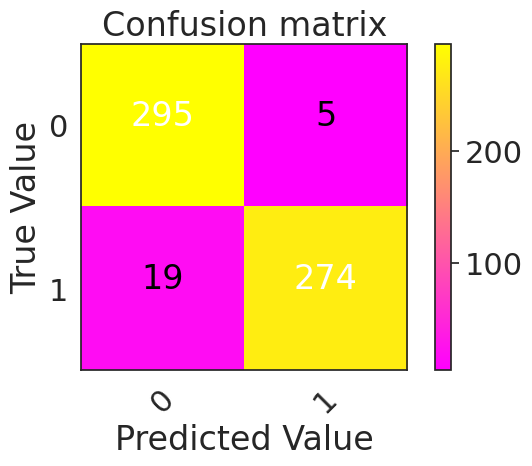

In [89]:
cm = confusion_matrix(y_train, pred)
plot_confusion_matrix(cm,class_names)

**TESTING ERROR**

In [92]:
pred = classifier.predict(X_test_all)

In [93]:
print ('Accuracy from sk-learn: {}'.format(classifier.score(X_test_all,y_test_all)))

Accuracy from sk-learn: 0.9415608981729435


**CONFUSION MATRIX**

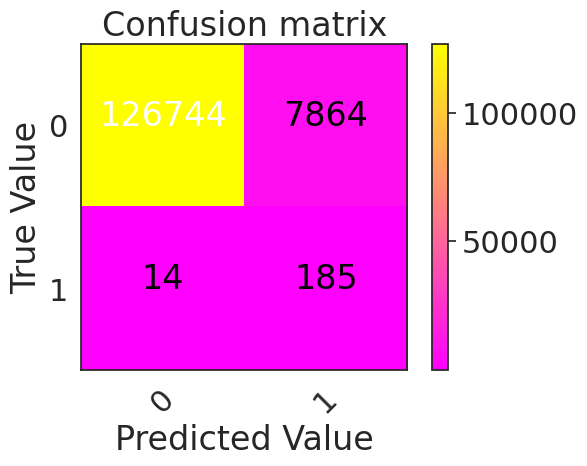

In [94]:
cm = confusion_matrix(y_test_all, pred)
plot_confusion_matrix(cm,class_names)

**Precision, Recall, F1-Score, Mean Absolute Error, Mean Percentage Error and Mean Squared Error**

In [95]:
report= classification_report(y_test_all,pred)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97    134608
           1       0.02      0.93      0.04       199

    accuracy                           0.94    134807
   macro avg       0.51      0.94      0.51    134807
weighted avg       1.00      0.94      0.97    134807



In [96]:
mean_abs_error = mean_absolute_error(y_test_all,pred)
mean_abs_percentage_error = np.mean(np.abs((y_test_all - pred) // y_test_all))
mse= mean_squared_error(y_test_all,pred)
r_squared_error = r2_score(y_test_all,pred)
print("Mean absolute error : {} \nMean Absolute Percentage error : {}\nMean Squared Error : {}\nR Squared Error: {}".format(mean_abs_error,mean_abs_percentage_error,mse,np.abs(r_squared_error)/100))

Mean absolute error : 0.05843910182705646 
Mean Absolute Percentage error : 0.00010385217384853902
Mean Squared Error : 0.05843910182705646
R Squared Error: 0.38646465194748253


**HYPERPARAMETER TUNING**

In [97]:
classifier_b = LogisticRegression(class_weight={0:0.6,1:0.4})

In [98]:
classifier_b.fit(X_train,y_train)

LogisticRegression(class_weight={0: 0.6, 1: 0.4})

In [99]:
pred_b = classifier_b.predict(X_test_all)
print(classifier_b.intercept_, classifier_b.coef_)

[-3.77061595] [[ 0.02093683 -0.03740154 -0.01132238  0.87639261 -0.42409349  0.03254143
   0.38569824 -1.02856826 -0.12740992 -0.62546546  0.2873789  -0.96486884
  -0.43128059 -0.99343318 -0.00901774 -0.2594917  -0.41260873  0.18377649
   0.0873341  -0.16122075  0.08107306  0.18179683 -0.10825579 -0.51254896
   0.29402474 -0.30451959  0.35870999 -0.10755336  0.00124832]]


In [100]:
print ('Accuracy from sk-learn after hyperpaarameter tuning: {}'.format(classifier_b.score(X_test_all,y_test_all)))

Accuracy from sk-learn after hyperpaarameter tuning: 0.9626948155511212


**CONFUSION MATRIX**

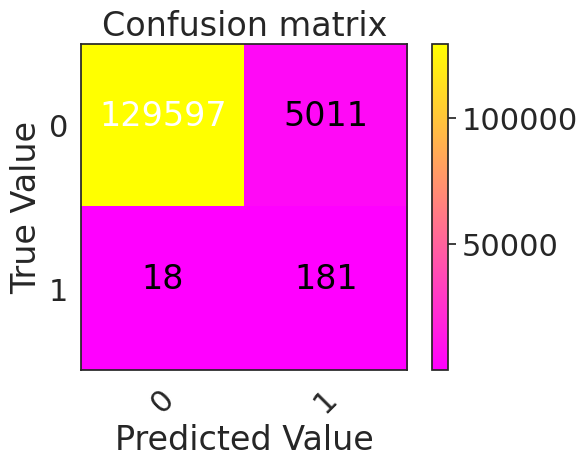

In [101]:
cm = confusion_matrix(y_test_all, pred_b)
plot_confusion_matrix(cm,class_names)

**Precision, Recall, F1-Score, Mean Absolute Error, Mean Percentage Error and Mean Squared Error**

In [102]:
report= classification_report(y_test_all,pred_b)
print(report)

              precision    recall  f1-score   support

           0       1.00      0.96      0.98    134608
           1       0.03      0.91      0.07       199

    accuracy                           0.96    134807
   macro avg       0.52      0.94      0.52    134807
weighted avg       1.00      0.96      0.98    134807



In [103]:
mean_abs_error = mean_absolute_error(y_test_all,pred_b)
mean_abs_percentage_error = np.mean(np.abs((y_test_all - pred_b) // y_test_all))
mse= mean_squared_error(y_test_all,pred_b)
r_squared_error = r2_score(y_test_all,pred_b)
print("Mean absolute error : {} \nMean Absolute Percentage error : {}\nMean Squared Error : {}\nR Squared Error: {}".format(mean_abs_error,mean_abs_percentage_error,mse,np.abs(r_squared_error)/100))

Mean absolute error : 0.037305184448878766 
Mean Absolute Percentage error : 0.00013352422351955016
Mean Squared Error : 0.037305184448878766
R Squared Error: 0.24308717119115125
